# FINAL Meteo 203 Lab Exercise
## Investigating the Onset of the 1997–1998 El Niño: A Zonal Wind and SST Anomaly Analysis  
---

First: Libraries are imported. This is to remove redundancies later on when importing packages.
The data is also imported and displayed, to ensure the data is complete.

In [31]:

# Importing libraries
import xeofs as xe
import xarray as xr
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Loading dataset
file_path = '..\..\data\era5_world.nc'
data = xr.open_dataset(file_path)

# Display dataset information
data

<xarray.Dataset> Size: 9GB
Dimensions:     (valid_time: 1030, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-10-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 16kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 4GB ...
    sst         (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-27T10:28 GRIB to CDM+CF via cfgrib-0.9.1...

---

Data is clipped to focus on the Pacific. The data is also grouped and averaged by season, each season being 3 months long. 

These will be the means that will be used in computing the anomaly later on.
The climatological mean spans from 1940 to 2025

---

In [24]:
# Clipping the data 
data_pacific = data.sel(longitude=slice(120, 280), latitude=slice(30, -30))

# Separating seasons and computing climatological means
JFM = data_pacific.sel(valid_time = data_pacific.valid_time.dt.month.isin([1,2,3])).mean(dim="valid_time")
AMJ = data_pacific.sel(valid_time = data_pacific.valid_time.dt.month.isin([4,5,6])).mean(dim="valid_time")
JAS = data_pacific.sel(valid_time = data_pacific.valid_time.dt.month.isin([7,8,9])).mean(dim="valid_time")
OND = data_pacific.sel(valid_time = data_pacific.valid_time.dt.month.isin([10,11,12])).mean(dim="valid_time")

data_pacific 

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 1030, latitude: 241, longitude: 641)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-10-01
  * latitude    (latitude) float64 2kB 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude   (longitude) float64 5kB 120.0 120.2 120.5 ... 279.5 279.8 280.0
    expver      (valid_time) <U4 16kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 636MB ...
    sst         (valid_time, latitude, longitude) float32 636MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-27T10:28 GRIB to CDM+CF via cfgrib-0.9.1...

---

Computing 1997 mean for each season.

---

In [26]:
data_1997 = data.sel(valid_time="1997", longitude=slice(120, 280), latitude=slice(30, -30))

# Separating seasons and computing climatological means
JFM_1997 = data_1997.sel(valid_time = data_1997.valid_time.dt.month.isin([1,2,3])).mean(dim="valid_time")
AMJ_1997 = data_1997.sel(valid_time = data_1997.valid_time.dt.month.isin([4,5,6])).mean(dim="valid_time")
JAS_1997 = data_1997.sel(valid_time = data_1997.valid_time.dt.month.isin([7,8,9])).mean(dim="valid_time")
OND_1997 = data_1997.sel(valid_time = data_1997.valid_time.dt.month.isin([10,11,12])).mean(dim="valid_time")

In [76]:
JFM_1997

<xarray.Dataset> Size: 1MB
Dimensions:    (latitude: 241, longitude: 641)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 2kB 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude  (longitude) float64 5kB 120.0 120.2 120.5 ... 279.5 279.8 280.0
Data variables:
    u10        (latitude, longitude) float32 618kB -0.5554 -0.5554 ... -2.03
    sst        (latitude, longitude) float32 618kB nan nan nan ... 294.1 294.0
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-27T10:28 GRIB to CDM+CF via cfgrib-0.9.1...

---
Computing for the anomalies and plotting them into subplots.
---

In [77]:
JFM_anom = JFM_1997 - JFM
AMJ_anom = AMJ_1997 - AMJ
JAS_anom = JAS_1997 - JAS
OND_anom = OND_1997 - OND

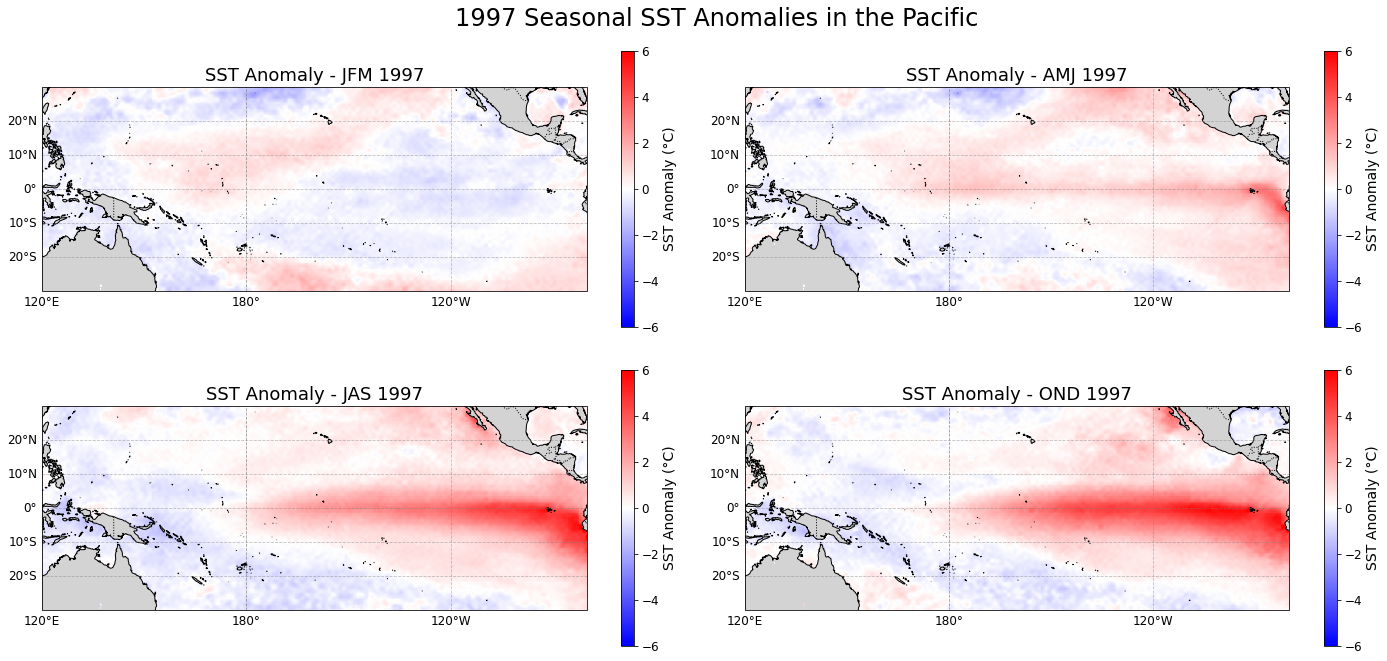

In [91]:
# Create 2x2 Subplots focused on the Pacific
projection = ccrs.PlateCarree(central_longitude=180)

fig, axs = plt.subplots(
    2, 2, figsize=(20, 10),
    subplot_kw={'projection': projection}
)

# Define a common plot styling function
def plot_spatial(ax, data, title, cmap='bwr', cbar_label="SST Anomaly (°C)"):

    # Add Cartopy features: land, borders, and coastlines
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.coastlines(resolution='50m')

    ax.set_extent([120, 280, -30, 30], crs=ccrs.PlateCarree())

    # Plot data using pcolormesh (gridded data)
    mesh = ax.pcolormesh(
        data.longitude, data.latitude, data,
        transform=ccrs.PlateCarree(), cmap=cmap,
        vmin=-6, vmax=6
    )

    gl = ax.gridlines(
        draw_labels=True,
        linewidth=0.8, color='gray', alpha=0.5, linestyle='--'
    )

    # Label formatting
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

    cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_label(cbar_label, fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    # Titles
    ax.set_title(title, fontsize=18)

    ax.tick_params(axis='both', labelsize=12)

# Plot the data for each subplot
plot_spatial(axs[0, 0], JFM_anom['sst'], 'SST Anomaly - JFM 1997')
plot_spatial(axs[0, 1], AMJ_anom['sst'], 'SST Anomaly - AMJ 1997')
plot_spatial(axs[1, 0], JAS_anom['sst'], 'SST Anomaly - JAS 1997')
plot_spatial(axs[1, 1], OND_anom['sst'], 'SST Anomaly - OND 1997')

fig.suptitle("1997 Seasonal SST Anomalies in the Pacific", fontsize=24, y=0.95)

plt.tight_layout()
plt.show()

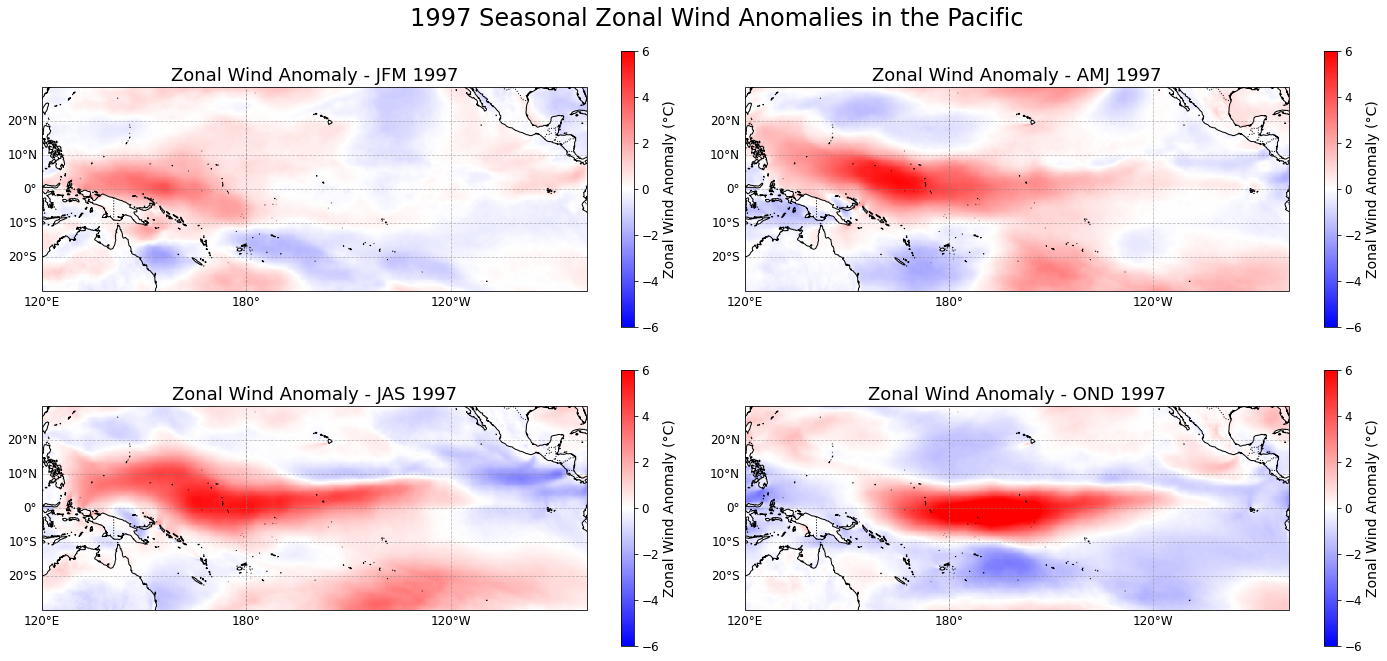

In [90]:
# Create 2x2 Subplots focused on the Pacific
projection = ccrs.PlateCarree(central_longitude=180)

fig, axs = plt.subplots(
    2, 2, figsize=(20, 10),
    subplot_kw={'projection': projection}
)

# Define a common plot styling function
def plot_spatial(ax, data, title, cmap='bwr', cbar_label="Zonal Wind Anomaly (°C)"):

    # Add Cartopy features: land, borders, and coastlines
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.coastlines(resolution='50m')

    ax.set_extent([120, 280, -30, 30], crs=ccrs.PlateCarree())

    # Plot data using pcolormesh (gridded data)
    mesh = ax.pcolormesh(
        data.longitude, data.latitude, data,
        transform=ccrs.PlateCarree(), cmap=cmap,
        vmin=-6, vmax=6
    )

    gl = ax.gridlines(
        draw_labels=True,
        linewidth=0.8, color='gray', alpha=0.5, linestyle='--'
    )

    # Label formatting
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

    cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_label(cbar_label, fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    # Titles
    ax.set_title(title, fontsize=18)

    ax.tick_params(axis='both', labelsize=12)

# Plot the data for each subplot
plot_spatial(axs[0, 0], JFM_anom['u10'], 'Zonal Wind Anomaly - JFM 1997')
plot_spatial(axs[0, 1], AMJ_anom['u10'], 'Zonal Wind Anomaly - AMJ 1997')
plot_spatial(axs[1, 0], JAS_anom['u10'], 'Zonal Wind Anomaly - JAS 1997')
plot_spatial(axs[1, 1], OND_anom['u10'], 'Zonal Wind Anomaly - OND 1997')

fig.suptitle("1997 Seasonal Zonal Wind Anomalies in the Pacific", fontsize=24, y=0.95)

plt.tight_layout()
plt.show()

The help of ChatGPT was utilized mainly for the generation of subplots.

Test